# Computer Vision color spaces

### Import statements

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### To edit an image making a copy of it is always a good idea!

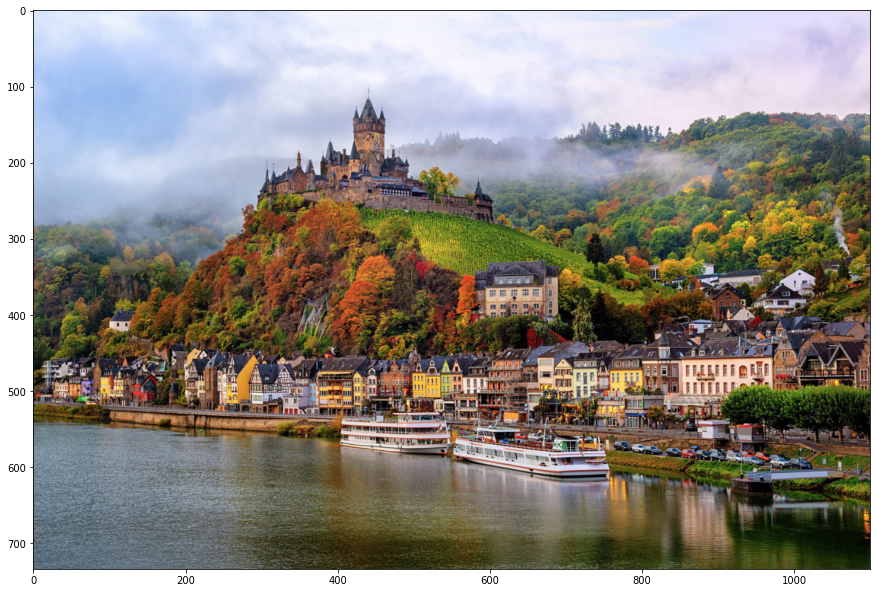

In [2]:
# Load an image
image = 'img/town.jpg'
town = cv2.imread(image)
bgr_image = town.copy()
rgb_image = cv2.cvtColor(bgr_image,cv2.COLOR_BGR2RGB)
# And make a copy of the original image to avoid manipulating the original image
plt.figure(figsize = (15,15))
plt.imshow(rgb_image);

[Hint](# "Numpy .copy function") 

## Color Spaces

### BGR Spliting the color channels

In [3]:
# Load a color image and split in is different B, G and R channels

B,G,R = cv2.split(bgr_image)

[Hint](# "cv2.split") 

In [4]:
# Show each channel channel on screen
B

array([[250, 251, 252, ..., 250, 250, 250],
       [250, 251, 252, ..., 250, 250, 250],
       [251, 251, 252, ..., 249, 249, 249],
       ...,
       [118, 130, 145, ...,   4,   6,   7],
       [114, 124, 132, ...,   7,   9,  10],
       [125, 127, 123, ...,  13,  16,  17]], dtype=uint8)

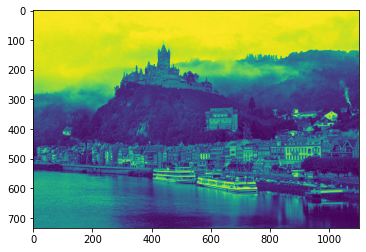

In [5]:
plt.imshow(B)

In [6]:
G

array([[231, 232, 233, ..., 223, 223, 223],
       [231, 232, 233, ..., 223, 223, 223],
       [232, 232, 233, ..., 222, 222, 222],
       ...,
       [104, 116, 131, ...,  42,  44,  45],
       [100, 110, 118, ...,  45,  47,  48],
       [111, 113, 109, ...,  51,  54,  55]], dtype=uint8)

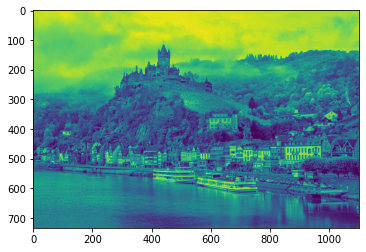

In [7]:
plt.imshow(G)

In [8]:
R

array([[223, 224, 225, ..., 232, 232, 232],
       [223, 224, 225, ..., 232, 232, 232],
       [224, 224, 225, ..., 231, 231, 231],
       ...,
       [ 82,  94, 109, ...,  30,  32,  33],
       [ 78,  88,  96, ...,  33,  35,  36],
       [ 89,  91,  87, ...,  39,  42,  43]], dtype=uint8)

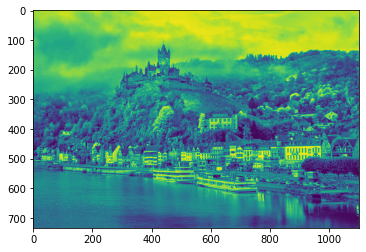

In [9]:
plt.imshow(R)

#### Merging the color channels

In [10]:
# Modify a channel and then merge them all again
R = R + 1

merge_image = cv2.merge([B,G,R])

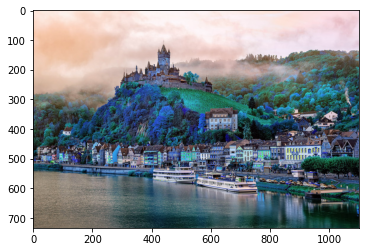

In [11]:
plt.imshow(merge_image)

[Hint](# "cv2.merge") 

In [12]:
merge_image.shape

(734, 1100, 3)

In [13]:
# Create a black canvas with the same size as the image you loaded
black = np.zeros(merge_image.shape[:2],dtype = 'uint8')
black.shape


(734, 1100)

[Hint](# "use numpy np.zeros function with the img.shape[:2]") 

In [14]:
B.shape

(734, 1100)

In [15]:
# Merge each channel with the black canvas 
# So you will end up with 3 images: (Red,Black,Black), (Black,Green,Black) and (Black,Black,Blue) 
# Assuming you are working with RGB, but BGR is also fine
B = cv2.merge([B,black,black])
G = cv2.merge([black,G,black])
R = cv2.merge([black,black,R])

[Hint](# "cv2.merge") 

### HSV: Hue Saturation Value

#### M&Ms challenge!

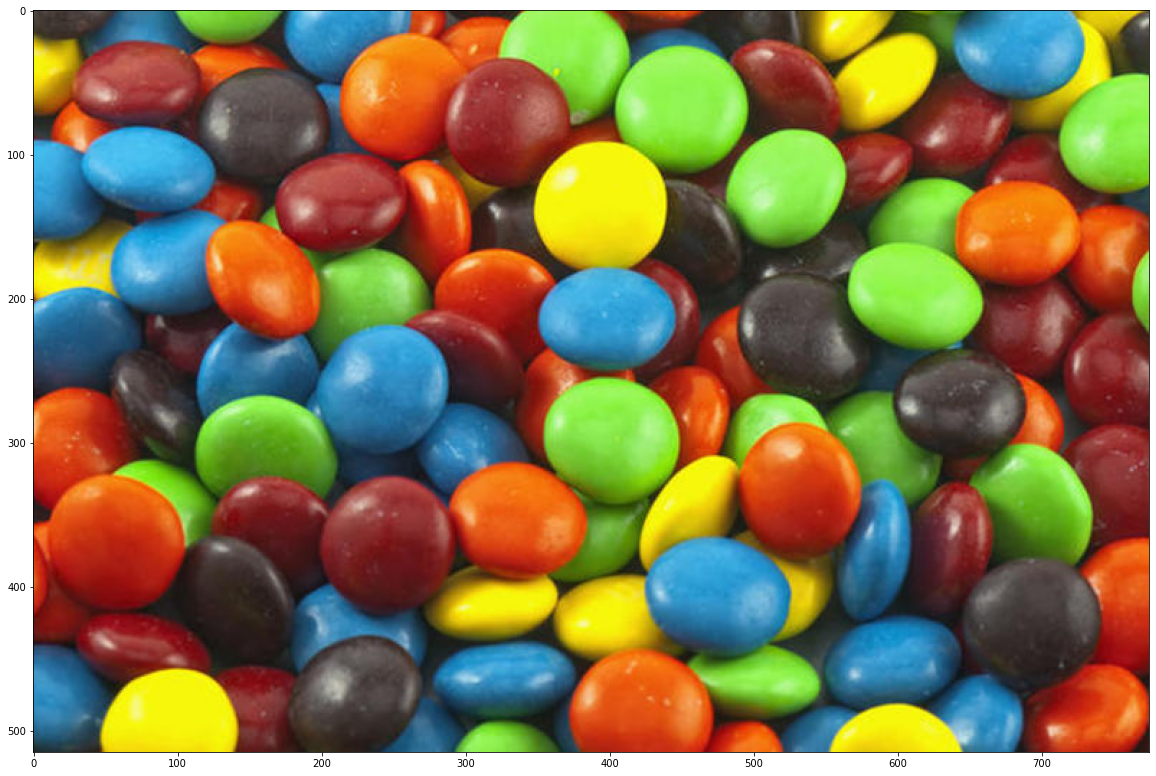

In [18]:
# Use the image below and convert it from BGR to HSV
img = cv2.imread('img/m.jpg')
plt.figure(figsize = (20,15));
image = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(image);

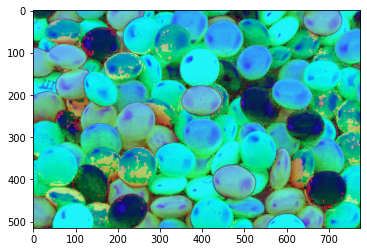

In [19]:
hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
plt.imshow(hsv_image)

In [20]:
# Split the H,S and V channels 
H,S,V = cv2.split(hsv_image)

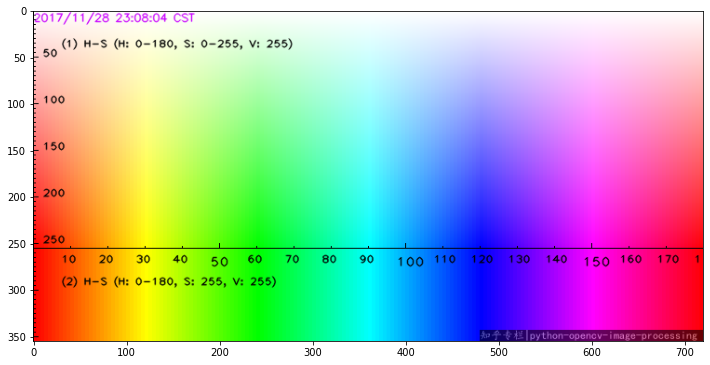

In [21]:
plt.figure(figsize = (12,12))
plt.imshow(cv2.cvtColor(cv2.imread('img/hsv.png'),cv2.COLOR_BGR2RGB))

[Hint](# "cv2.cvtColor") 

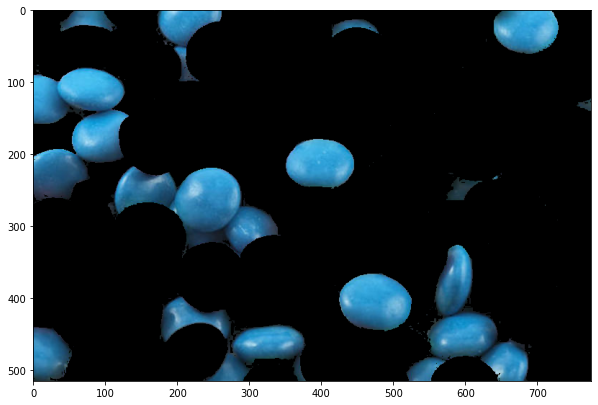

In [22]:
# Create a mask to filter out the Blue M&Ms (remember you need a lower and upper range)
# Make a copy of the hsv image and apply the mask to it, then display the image
image1 = hsv_image.copy()
lower = (90,50,0)
upper = (125,250,255)
mask = cv2.inRange(image1,lower,upper)
blue_image = image.copy()
blue_image[mask == 0] = [0,0,0]
plt.figure(figsize = (10,10))
plt.imshow(blue_image)

[Hint](# "cv2.inRange") 

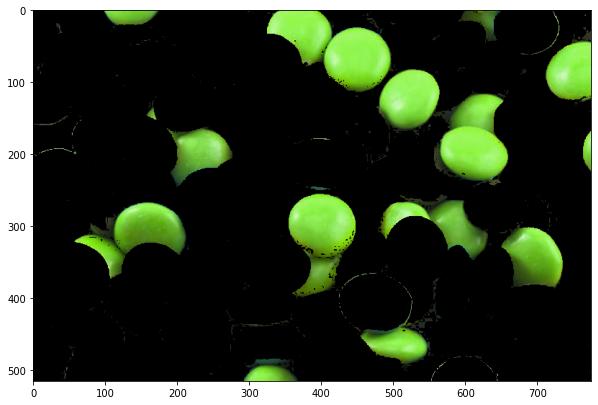

In [23]:
# Repeat the same but now with the greens
image1 = hsv_image.copy()
lower = (35,50,0)
upper = (85,250,255)
mask = cv2.inRange(image1,lower,upper)
green_image = image.copy()
green_image[mask == 0] = [0,0,0]
plt.figure(figsize = (10,10))
plt.imshow(green_image)

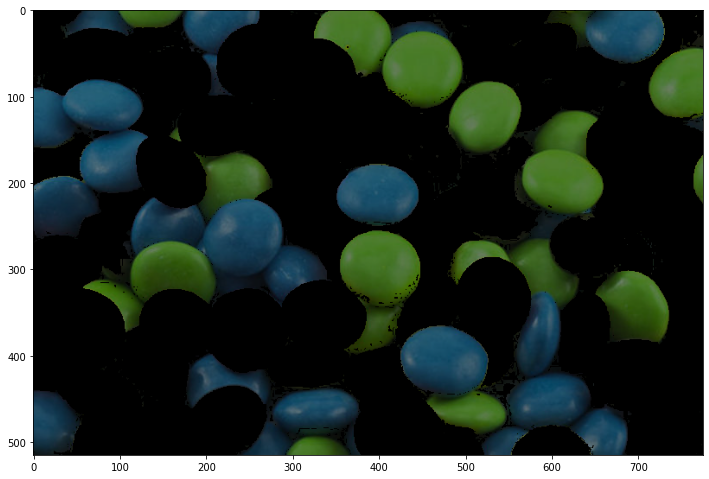

In [48]:
# Now combine both masks togheter so we can see all greens and blues in the same image!
plt.figure(figsize = (12,12))
plt.imshow(cv2.addWeighted(blue_image,0.5,green_image,0.5,0))

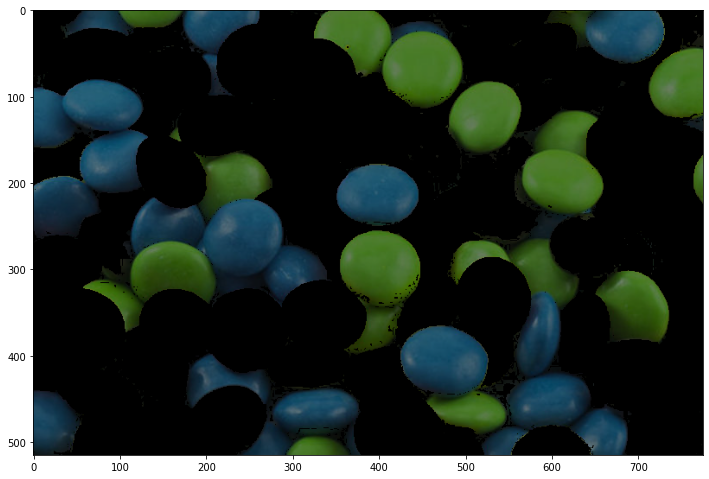

In [49]:
# Now lets combine both masks but also some opacity, we want to be able to see all M&Ms but
# Blues and greens will show as int he image above while the other colors will be faded out with some opacity
# You just need to add alpha to apply opacity to the dark parts of the mask, then display the image
plt.figure(figsize = (12,12))
plt.imshow(cv2.addWeighted(blue_image,0.5,green_image,0.5,0))

[Hint](# "cv2.addWeighted") 

In [ ]:
# Below you will find an example with oranges and greens just for reference so you can see what we want to accomplish
# In this example the oranges are not perfect, and it can be improved a lot easily.

## Mini project

### Level 1

#### Ball tracker

1. Given an image with a ball on it isolate the ball

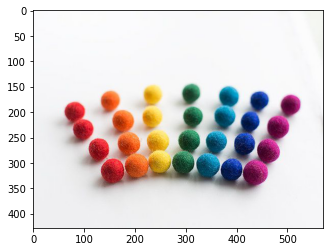

In [4]:
import cv2
import matplotlib.pyplot as plt
ball = cv2.imread('img/green_ball.jpg')
rgb_ball = cv2.cvtColor(ball,cv2.COLOR_BGR2RGB)
plt.imshow(rgb_ball)

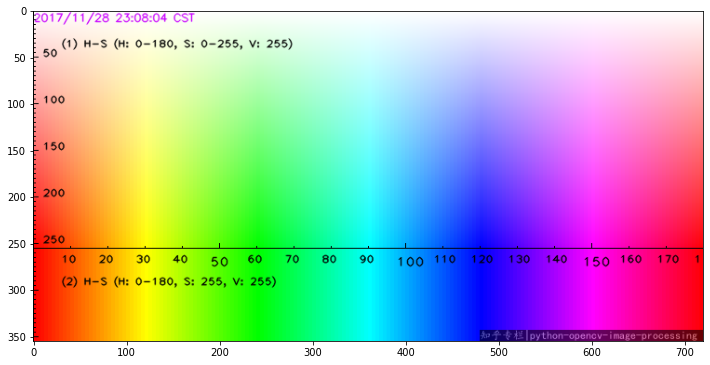

In [5]:
plt.figure(figsize = (12,12))
plt.imshow(cv2.cvtColor(cv2.imread('img/hsv.png'),cv2.COLOR_BGR2RGB))

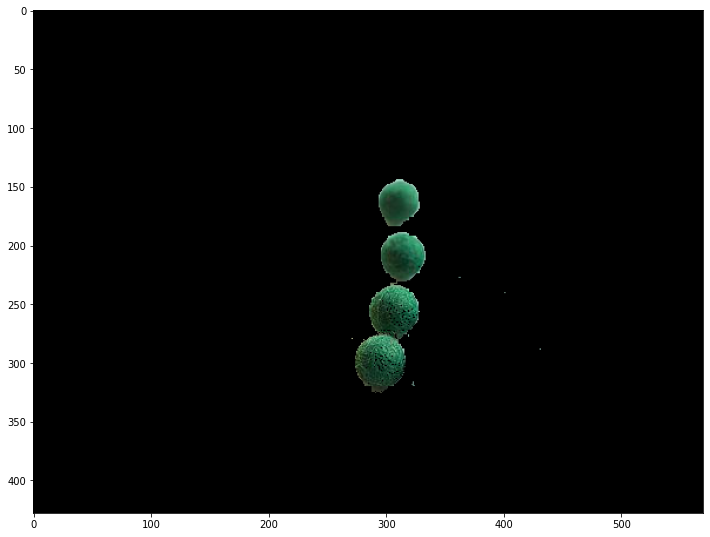

In [6]:
hsv_image = cv2.cvtColor(rgb_ball,cv2.COLOR_RGB2HSV)
Image = hsv_image.copy()
lower = (35,50,0)
upper = (85,250,255)

mask  = cv2.inRange(Image,lower,upper)
old_image = rgb_ball.copy()
old_image[mask == 0] = [0,0,0]
plt.figure(figsize = (12,12))
plt.imshow(old_image)

### Level 2

#### Ball tracker

1. Make it track a ball in real time (either with a video or a webcam)

In [ ]:
capture = cv2.VideoCapture(0)
while True:
    val,frame = capture.read()
    hsv_frame = cv2.cvtColor(frame,cv2.COLOR_RGB2HSV)
    
#     lower = (35,50,0)
#     upper = (85,250,255)
    lower2 = (170,50,0)
    upper2 = (180,250,255)

    mask  = cv2.inRange(hsv_frame,lower2,upper2)
    cv2.imshow('masked_tab',mask)
    if cv2.waitKey(1) == ord('q'):
        break
capture.release()
capture.distroyAllWindows()

    #plt.figure(figsize = (12,12))
    #plt.imshow(old_image)

### Level 3

# Ball Tracker

1. Can you make it track two or more different color balls at the same time?

In [3]:
import cv2
import matplotlib.pyplot as plt

In [ ]:
capture = cv2.VideoCapture(0)
while True:
    val,frame = capture.read()
    hsv_frame = cv2.cvtColor(frame,cv2.COLOR_RGB2HSV)
    
    lower1 = (35,50,0)
    upper1 = (85,250,255)
    
    lower2 = (170,50,0)
    upper2 = (180,250,255)
    
    mask1  = cv2.inRange(hsv_frame,lower1,upper1)
    mask2 = cv2.inRange(hsv_frame,lower2,upper2)
    cv2.imshow('masked_tab',cv2.addWeighted(mask1,0.5,mask2,1,1))
    if cv2.waitKey(1) == ord('q'):
        break
capture.release()
cv2.distroyAllWindows()